# Probability:
a measure of how likely an event is to occur 

* probability of event = number of favourable output / total output 

# 1. Write a Python program to simulate the following scenarios:  
*  a. Tossing a coin 10,000 times and calculating the experimental probability of heads and tails.  
*  b. Rolling two dice and computing the probability of getting a sum of 7.  
 > Steps  
      a. Use Python's random module for simulations.  
      b. Implement loops for repeated trials.  
      c. Track outcomes and compute probabilities. 


In [24]:
# a. Tossing a coin 10,000 times and calculating the experimental probability of heads and tails.
import random
def calculate_coin_toss(num_toss):
    heads = 0
    tails = 0
    for _ in range(num_toss):
        if random.randint(1,2) == 1:
            heads+=1
        else:
            tails+=1
    return heads/num_toss,tails/num_toss
    
num_toss = int(input("Enter the number of tosses: "))
prob_heads,prob_tails = calculate_coin_toss(num_toss)

print(f"After {num_toss} tosses")
print(f"Probability of Heads: {(prob_heads*100):.2f} %")
print(f"Probability of Tails:{(prob_tails*100):.2f} %")

Enter the number of tosses: 10000
After 10000 tosses
Probability of Heads: 50.18 %
Probability of Tails:49.82 %


## b. Rolling two dice and computing the probability of getting a sum of 7.

In [28]:

def roll_dice(num_roll):
    sum_seven = 0
    
    for _ in range(num_roll):
        die1 = random.randint(1,6)
        die2 = random.randint(1,6)
        if die1 + die2 == 7:
            sum_seven +=1
    return sum_seven/num_roll


num_roll = int(input("Enter the number to roll: "))
result = roll_dice(num_roll)
print(f"probability of 7 sum of rolling dice: {(result*100):.2f} %")

Enter the number to roll: 6
probability of 7 sum of rolling dice: 16.67 %


# 2. Write a function to estimate the probability of getting at least one "6" in 10 rolls of a fair die.  
 >  Steps  
      a. Simulate rolling a die 10 times using a loop.  
      b. Track trials where at least one "6" occurs.  
      c. Calculate the proportion of successful trials.


In [29]:
def roll_six(rolls):
    occur_six = 0
    for i in range(rolls):
        if random.randint(1,6) == 6:
            occur_six +=1
            
    return occur_six /rolls

rolls = int(input("Enter numbers of rolls: "))
result1 = roll_six(rolls)
print(f"probability of 6 occur in rolls dices :{(result1*100):.2f} %")

Enter numbers of rolls: 10
probability of 6 occur in rolls dices :20.00 %


# 3. Conditional Probability:¶
The probability of an event happening given that another event has already occured
Conditional Probability is used to calcuate Bayes theorem.

# Bayes Theorem:
Uses conditional probability to update beliefs based on new evidence.
Bayes theorem reverses conditional probability, allowing us to infer causes from effects

* 3. A bag contains 5 red, 7 green, and 8 blue balls. A ball is drawn randomly, its color noted, and it is put back into the bag. If this process is repeated 1000 times, write a Python program to estimate:  
  a. The probability of drawing a red ball given that the previous ball was blue.  
  b. Verify Bayes' theorem with the simulation results.  


Steps  
    a. Use random sampling to simulate the process.  
    b. Compute conditional probabilities directly from the data. 


In [6]:
import random

def simulate_ball_draws(num_draws):

    bag = ['red'] * 5 + ['green'] * 7 + ['blue'] * 8
    total_balls = len(bag)

    red_given_blue_count = 0
    blue_count = 0
    red_count = 0 
    red_and_blue_count = 0

    previous_ball = None

    for _ in range(num_draws):
        ball = random.choice(bag)

        if previous_ball == 'blue':
            blue_count += 1
            if ball == 'red':
                red_given_blue_count += 1
            
            
        if ball == 'red':
            red_count += 1

        if previous_ball == 'blue' and ball == 'red':
            red_and_blue_count += 1

        previous_ball = ball

    # Estimate P(Red | Previous was Blue)
    p_red_given_blue = red_given_blue_count / blue_count if blue_count > 0 else 0

    #Estimates to verify Bayes theorem

    p_red_and_blue = red_and_blue_count/num_draws
    p_blue = blue_count/num_draws
    p_red = red_count/num_draws

    return p_red_given_blue, p_red_and_blue, p_blue, p_red


# Simulation parameters
num_draws = 10000#int(input("enter the draws: "))

# Run simulation and get results
p_red_given_blue, p_red_and_blue, p_blue, p_red = simulate_ball_draws(num_draws)


# Print estimated conditional probability
print(f"Estimated P(Red | Previous was Blue): {(p_red_given_blue*100):.2f} %")

estimated_p_red_given_blue_times_p_blue = p_red_given_blue * p_blue

print("\nVerifying Bayes' Theorem:")
print(f"Estimated P(Red ∩ Blue): {(p_red_and_blue*100):.2f} %")
print(f"Estimated P(Red | Blue) * P(Blue): {(estimated_p_red_given_blue_times_p_blue*100):.2f} %")

Estimated P(Red | Previous was Blue): 25.11 %

Verifying Bayes' Theorem:
Estimated P(Red ∩ Blue): 10.03 %
Estimated P(Red | Blue) * P(Blue): 10.03 %


# 4.Random Variables and Discrete Probability:

## Random Variables:
* A random variable is a numerical outcome of a random event. It assigns a number to each possible outcome of an experiment.

## Discrete Probability:
* Discrete Probability distribution-> Used for discrete variables(e.g. Binomial , distribution.) A discrete probability distribution assigns probabilities to each possible value of a discrete random variable.

## Mean , Variance, and Standard Deviation:
* Mean:
The mean (average) is the central value of a dataset. 
>e.g -> If students's test scores are (80,85,90,95,100). x = 80+85+90+95+100 / 5 = 90
* Variance :
Variance measures how spread out the values are from the mean.
>var(x) = 50 -> (80-90)^2 like this every value divided by 5
  High variance -> Data is spread out. ** Low variance -> Data is closer to the mean

* Standard Deviation:
The standart deviation is the square root of variance and measures how much data deviates from the mean.

>sigma = square of var(x)
Small sigma -> Data is close to the mean.
Large sigma -> Data is widely spread.

* 4. Generate a sample of size 1000 from a discrete random variable with the following distribution:  
 - P(X=1) = 0.25  
 - P(X=2) = 0.35  
 - P(X=3) = 0.4  
 > Compute the empirical mean, variance, and standard deviation of the sample.  
   Steps:
  > - a. Use numpy.random.choice() to generate the sample.  
  > -  b. Use numpy methods to calculate mean, variance, and standard deviation.


In [1]:
import numpy as np

# Define the possible values and their probabilities
values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.40]

# Generate a sample of size 1000
sample_size = 1000
sample = np.random.choice(values, size=sample_size, p=probabilities)

# Compute the empirical mean
mean_empirical = np.mean(sample)

# Compute the empirical variance
variance_empirical = np.var(sample, ddof=0)  # Population variance (ddof=0) Degree of Freedom

# Compute the empirical standard deviation
std_dev_empirical = np.std(sample, ddof=0)  # Population std deviation (ddof=0)

# Print the results
print(f"Empirical Mean: {mean_empirical:.2f}")
print(f"Empirical Variance: {variance_empirical:.2f}")
print(f"Empirical Standard Deviation: {std_dev_empirical:.2f}")


Empirical Mean: 2.17
Empirical Variance: 0.61
Empirical Standard Deviation: 0.78


# 5.Continuous Random Variables:
* Continous Random Variable -> Takes an infinite number of values within a range. e.g-> Height of students -> Can be any real number like 5.4ft,5.6ft,etc.(Continuous)
* Used for continous variables(e.g., Normal Distribution)

## Exponential Distribution:
### Purpose:
* Models the time between events in a Poisson process (e.g., time between arrivals of customers).

* Applied in survival analysis and reliability engineering.

* 5. Simulate 2000 random samples from an exponential distribution with a mean of 5. Visualize the distribution using:  
  a. A histogram.  
  b. A probability density function (PDF) overlay.  
 > Steps  
      a. Use numpy.random.exponential().  
      b. Use matplotlib to create visualizations.


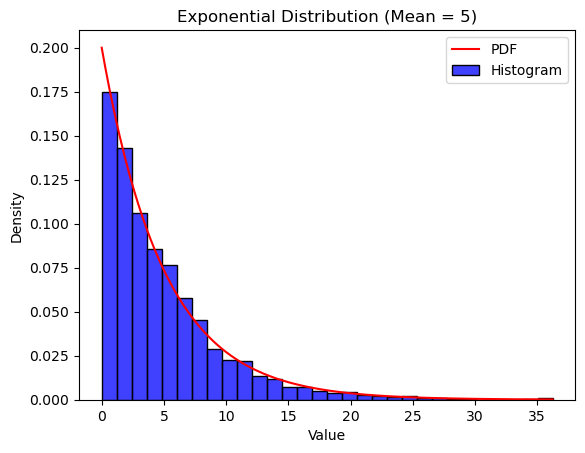

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
mean = 5
lambda_param = 1 / mean

# Step 1: Simulate 2000 random samples from an exponential distribution
samples = np.random.exponential(scale=mean, size=2000)

# Step 2: Plot the histogram
sns.histplot(samples, bins=30, kde=False, stat="density", label="Histogram", color='blue')

# Step 3: Calculate the PDF and overlay it
x_values = np.linspace(0, max(samples), 1000)
pdf_values = expon.pdf(x_values, scale=mean)
plt.plot(x_values, pdf_values, label='PDF', color='red')

# Customizing the plot
plt.title("Exponential Distribution (Mean = 5)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# 6.Central Limit Theorem:
* The Central Limit Theorem states that when you take many random samples, the distribution of their sample means will approach a normal distribution regardless of the original data distribution regardless of the original data distribution.

>- Example:
 if you measure the heights of 30 randomly selected people multiple times, the distribution of sample means will be approximately normal, even if the individual heights are not normally distributed.
 
 
 # Unifrom Distribution:
## Purpose:
* Used in scenarios where each outcome is equally likely.

* Often used for generating random numbers and in simulations.

 * 6. Simulate the Central Limit Theorem by following these steps  
  a. Generate 10,000 random numbers from a uniform distribution.  
  b. Draw 1000 samples of size n = 30.  
  c. Calculate and visualize the distribution of sample means.  
  >* Steps  
      a. Use numpy.random.uniform().  
      b. Plot both the uniform distribution and the sample mean distribution for comparison.


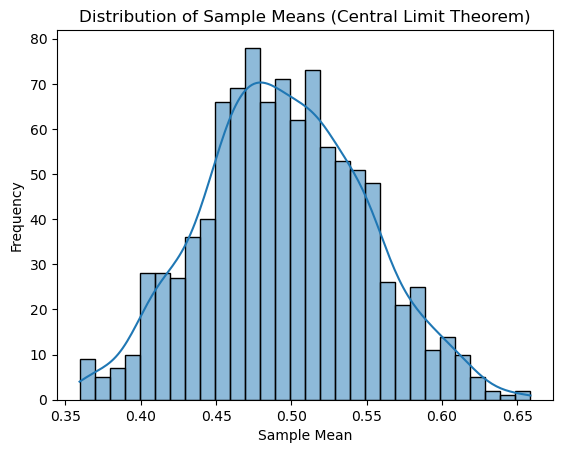

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step a: Generate 10,000 random numbers from a uniform distribution
uniform_data = np.random.uniform(low=0, high=1, size=10000)

# Step b: Draw 1000 samples of size n = 30 and calculate the sample means
sample_size = 30
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(uniform_data, size=sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Step c: Visualize the distribution of sample means
sns.histplot(sample_means, bins=30, kde=True)
plt.title("Distribution of Sample Means (Central Limit Theorem)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()